In [1]:
# import the required libraries

# for mathemaical operations
import numpy as np
# for dataframe manipulations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# setting parameters for visualization
plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')

In [2]:
#  read the data set
data = pd.read_csv('med-insurance.csv')
data.shape

(1338, 7)

In [3]:
# check the head of the dataset
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
# lets check the missing values in the dataset
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [5]:
# lets check the descriptive summary
data.describe().style.background_gradient(cmap = 'Greens')

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### Univariate Analysis

/tmp/ipython-input-583728768.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['children'], palette = 'magma')


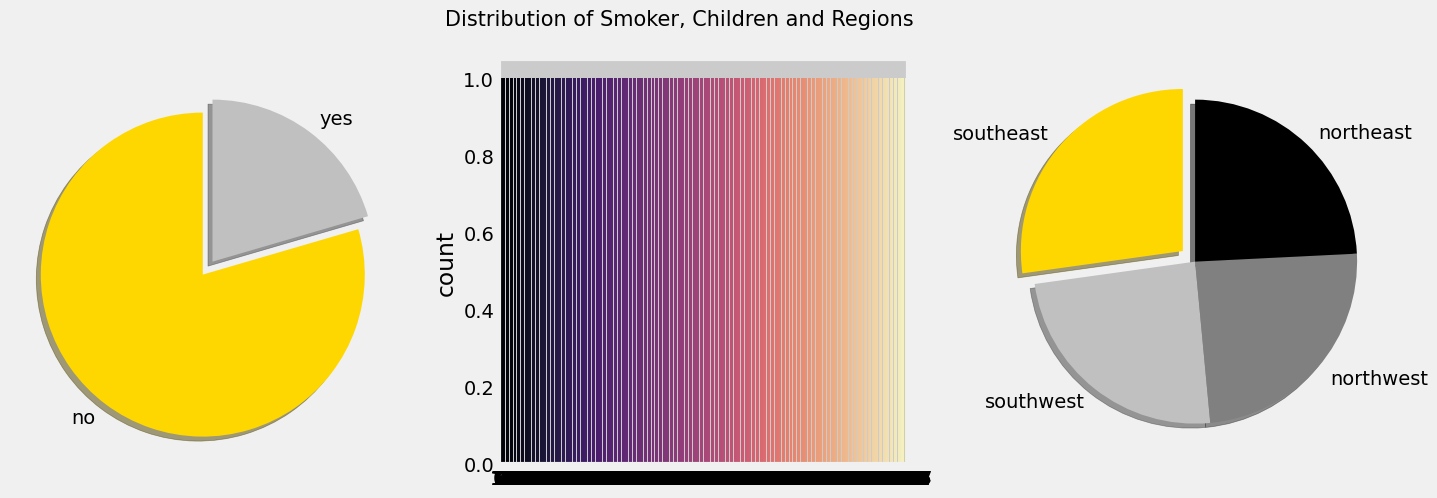

In [6]:
#  check the distribution of smoker, children and region

plt.subplot(1, 3, 1)
plt.pie(data['smoker'].value_counts().values,
        labels = data['smoker'].value_counts().index,
        colors = ['gold','silver'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0])

plt.subplot(1, 3, 2)
sns.countplot(data['children'], palette = 'magma')
plt.grid()

plt.subplot(1, 3, 3)
plt.pie(data['region'].value_counts().values,
        labels = data['region'].value_counts().index,
        colors = ['gold','silver','grey','black'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0, 0, 0])
plt.suptitle('Distribution of Smoker, Children and Regions', fontsize = 15)
plt.show()

/tmp/ipython-input-460104939.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], color = 'black')
/tmp/ipython-input-460104939.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'], color = 'orange')
/tmp/ipython-input-460104939.py:14: UserWarning: 

`distplot` is a deprec

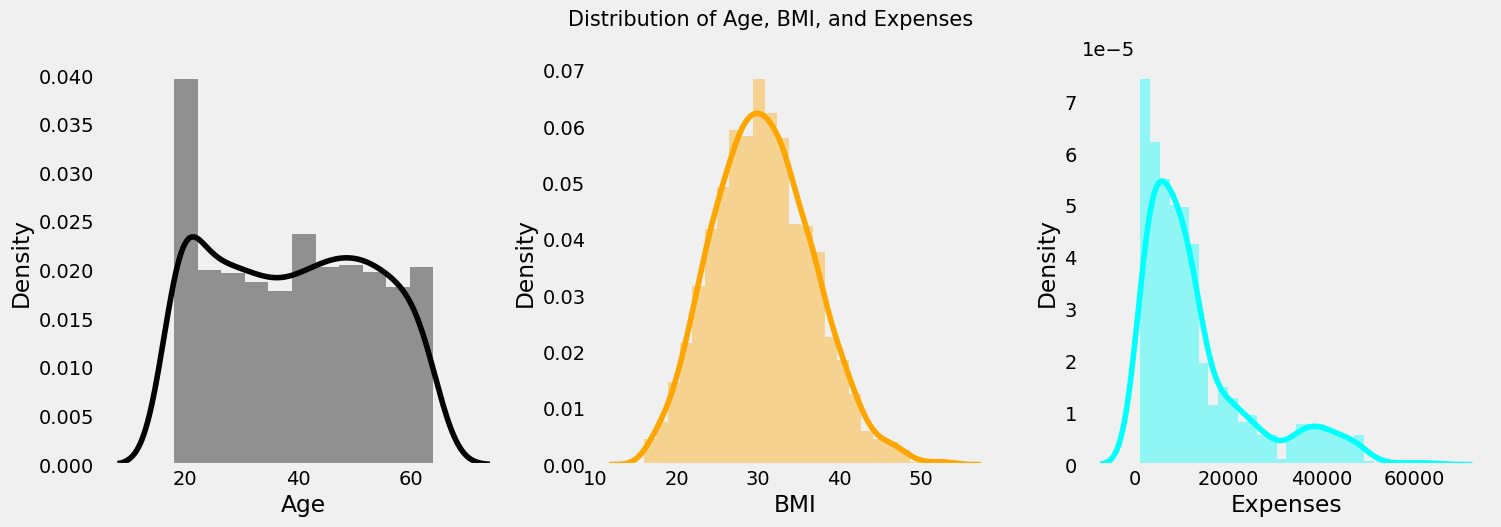

In [7]:
#  check the distribution of age, bmi and expenses

plt.subplot(1, 3, 1)
sns.distplot(data['age'], color = 'black')
plt.xlabel('Age')
plt.grid()

plt.subplot(1, 3, 2)
sns.distplot(data['bmi'], color = 'orange')
plt.xlabel('BMI')
plt.grid()

plt.subplot(1, 3, 3)
sns.distplot(data['expenses'], color = 'aqua')
plt.xlabel('Expenses')
plt.grid()

plt.suptitle('Distribution of Age, BMI, and Expenses', fontsize = 15)
plt.show()

### Bivariate Analysis

In [8]:
# understand the impact of age on Medical Expenses
px.scatter(data, y = 'expenses',
           x = 'age',
           marginal_y = 'violin',
           trendline = 'ols')

* With Increasing Age, Expense is expeted to increase, but It is not obvious for all the scenarios.

In [9]:
# lets understand the impact of bmi on Medical Expenses
px.scatter(data, y = 'expenses',
           x = 'bmi',
           marginal_y = 'violin',
           trendline = 'ols')

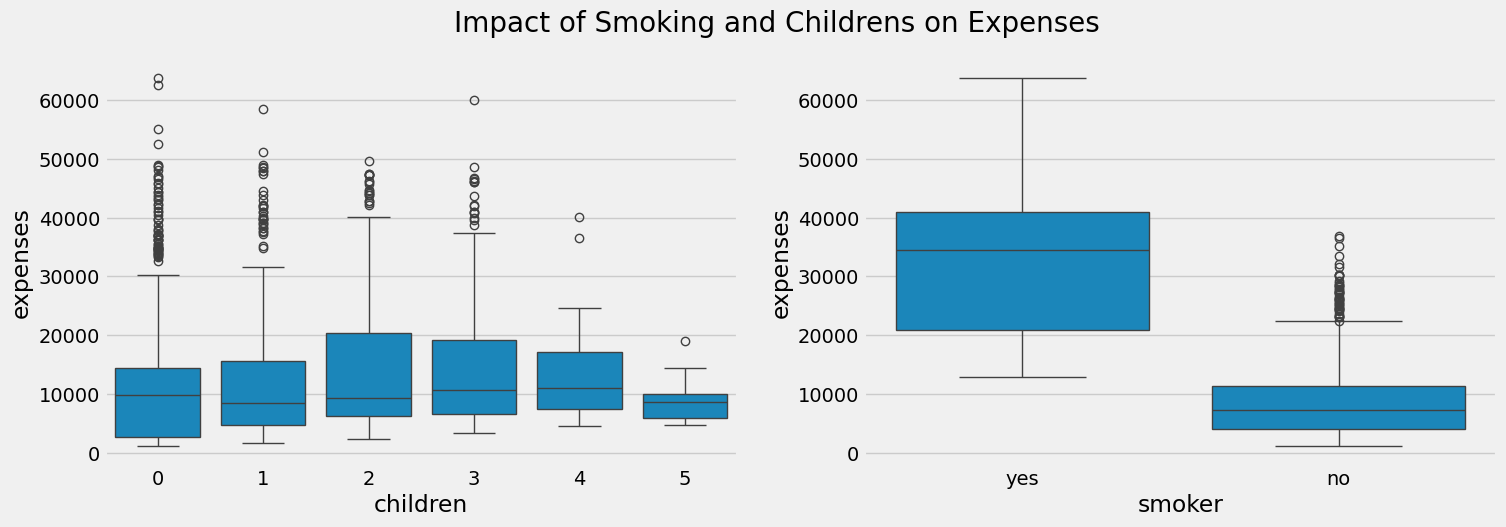

In [11]:
# lets check the impact of smoking and childrens in Medical Expenses

plt.subplot(1, 2, 1)
sns.boxplot(x=data['children'], y=data['expenses'])

plt.subplot(1, 2, 2)
sns.boxplot(x=data['smoker'], y=data['expenses'])

plt.suptitle('Impact of Smoking and Childrens on Expenses', fontsize = 20)
plt.show()

## Multivariate Analysis

In [12]:
# As we can see from the above chart that having 4 and 5 childrens is having similar impact on expenses
# so let's cap these values

data['children'] = data['children'].replace((4, 5), (3, 3))

# lets check the value counts
data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,200


In [13]:
px.scatter(data,
        x="expenses",
                 y="age",
                 facet_row="children",
                 facet_col="region",
                 color="smoker",
                 trendline="ols")


* The Expenses of Smokers in all regions ranges from 20 to 60k
* Whereas the Expenses of Non Smokers in all regions ranges from 10 to 20K
* The Lesser range of Expense is for lesser age people and vice versa.

In [14]:
px.scatter(data,
        x="expenses",
                 y="bmi",
                 facet_row="children",
                 facet_col="region",
                 color="smoker",
                 trendline="ols")

* We can clearly see that there is a increasing pattern for BMI as well.
* For smoker with less BMI: Expense is around 20k
* For Smokers with High BMI: Expense is around 50K
* For Non Smokers BMI is not a Huge Factor, The Expense range from 5k to 10k

In [15]:
# A Bubble Chart to Represent the relation of Expense with BMI, Age, smoking
# only for the North West Region
px.scatter(data,
                 x="expenses",
                 y="bmi",
                 size="age",
                 color="smoker",
           hover_name="expenses", size_max=15)

* This Chart makes it clear that BMI is not powerful indicator Expenses, as people having less BMI also have high Medical Expenses.
* This chart makes it clear that People who smoke have higher Medical Expenses.
* The Size of Bubble, which represents age, shows that people having higher expenses belong to Higher Expenses category

In [16]:
px.bar_polar(data, r="expenses", theta="region", color = 'sex', template = 'plotly_dark',
            color_discrete_sequence= px.colors.sequential.Plasma_r)

* This Chart clearly depits that the Southeast region has higher expenses compared to other regions.
* This Chart clearly shows that Males have Higher Expenses in general in all the regions.

In [17]:
#  check the impact of Regions in Expenses

data[['expenses', 'region']].groupby(['region']).agg(['min','mean','max']).style.background_gradient(cmap = 'Wistia')

In [18]:
# as we can see that all the columns are important, we will not remove any column
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Data Processing

In [19]:
#  perform encoding

# as we know males have higher expense than females, lets encode males as 2, and females as 1,
# similarly smokers, have highers expense, so we will encode smokers as 2, and non smokers as 1,
# as we know that the south east region has higher expense than other regions

data['sex'] = data['sex'].replace(('male','female'), (2, 1))
data['smoker'] = data['smoker'].replace(('yes','no'), (2, 1))
data['region'] = data['region'].replace(('southeast','southwest','northeast','northwest'),(2, 1, 1, 1))

# check whether any categorical column is left
data.select_dtypes('object').columns

/tmp/ipython-input-3253871571.py:7: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-3253871571.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-3253871571.py:9: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Index([], dtype='object')

In [20]:
# now lets check our data again
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,2,1,16884.92
1,18,2,33.8,1,1,2,1725.55
2,28,2,33.0,3,1,2,4449.46
3,33,2,22.7,0,1,1,21984.47
4,32,2,28.9,0,1,1,3866.86


In [21]:
#  form dependent and independent sets

y = data['expenses']
x = data.drop(['expenses'], axis = 1)

print(y.shape)
print(x.columns)

(1338,)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [22]:
#  perform train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [23]:
#  perform standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Predictive Modelling

In [24]:
#  create the Model

#  create a simple Linear Regression Model
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)

In [25]:
#  check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred1)
print("R2 Score :",r2_score)

RMSE Score : 5665.098223602283
R2 Score : 0.7983199562954781


In [26]:
#  create a Random Forest Model

from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)

#  check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred2)
print("R2 Score :",r2_score)

RMSE Score : 4487.017815586997
R2 Score : 0.873478705683225


In [27]:
# create a Gradient Boosting Model

from sklearn.ensemble import GradientBoostingRegressor

model3 = GradientBoostingRegressor()
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_test)

#  check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred3)
print("R2 Score :",r2_score)

RMSE Score : 4093.2715100014866
R2 Score : 0.8947095107441357


In [28]:
#  create an ensemble by averaging

avg_model = (y_pred1 + y_pred2 + y_pred3)/3

#  check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, avg_model)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, avg_model)
print("R2 Score :",r2_score)

RMSE Score : 4306.38641357149
R2 Score : 0.8834602635553339


In [36]:
#  create an weighted averaging model

# lets give 50% weight to gradient boosting
# 30% weight to random forest
# and 20% weight to linear regression

weight_avg_model = 0.2*y_pred1 + 0.3*y_pred2 + 0.5*y_pred3

#  check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, weight_avg_model)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, weight_avg_model)
print("R2 Score :",r2_score)

RMSE Score : 4182.085838209295
R2 Score : 0.8900908312074735


In [30]:
## cross validaion

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model3, x, y, cv=5)
print(scores)

[0.87582816 0.7927084  0.89222908 0.84608824 0.85834983]


* as we can see that the scores are not varying much, so we can say that this model is good.

In [38]:
from sklearn.ensemble import StackingRegressor
stacking_reg = StackingRegressor([('gb', model3), ('rf', model2), ('lr', model1)],
                                final_estimator=LinearRegression())

In [39]:
print(stacking_reg)

StackingRegressor(estimators=[('gb', GradientBoostingRegressor()),
                              ('rf', RandomForestRegressor()),
                              ('lr', LinearRegression())],
                  final_estimator=LinearRegression())


In [40]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create the stacking regressor
stacking_reg = StackingRegressor([('gb', model3), ('rf', model2), ('lr', model1)],
                                final_estimator=LinearRegression())

# Fit the stacking regressor
stacking_reg.fit(x_train, y_train)

# Make predictions
stacking_pred = stacking_reg.predict(x_test)

# Evaluate performance
stacking_r2 = r2_score(y_test, stacking_pred)
stacking_rmse = np.sqrt(mean_squared_error(y_test, stacking_pred))

print(f"Stacking Regressor R²: {stacking_r2:.4f}")
print(f"Stacking Regressor RMSE: {stacking_rmse:.4f}")

# Compare with  manual ensemble
manual_ensemble_pred = 0.5 * model3.predict(x_test) + 0.3 * model2.predict(x_test) + 0.2 * model1.predict(x_test)
manual_r2 = r2_score(y_test, manual_ensemble_pred)

print(f"Manual ensemble (50/30/20) R²: {manual_r2:.4f}")
print(f"Stacking vs Manual difference: {stacking_r2 - manual_r2:.4f}")

Stacking Regressor R²: 0.8940
Stacking Regressor RMSE: 4106.1319
Manual ensemble (50/30/20) R²: 0.8901
Stacking vs Manual difference: 0.0040


In [41]:
# Check the meta-learner coefficients
print("Stacking learned weights:")
print(f"GB coefficient: {stacking_reg.final_estimator_.coef_[0]:.3f}")
print(f"RF coefficient: {stacking_reg.final_estimator_.coef_[1]:.3f}")
print(f"LR coefficient: {stacking_reg.final_estimator_.coef_[2]:.3f}")
print(f"Intercept: {stacking_reg.final_estimator_.intercept_:.3f}")

Stacking learned weights:
GB coefficient: 0.907
RF coefficient: -0.002
LR coefficient: 0.100
Intercept: -61.382


In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(stacking_reg, x, y, cv=5)
print(scores)

[0.87566045 0.79550248 0.8894962  0.84673471 0.85818097]


## Comparison of Models

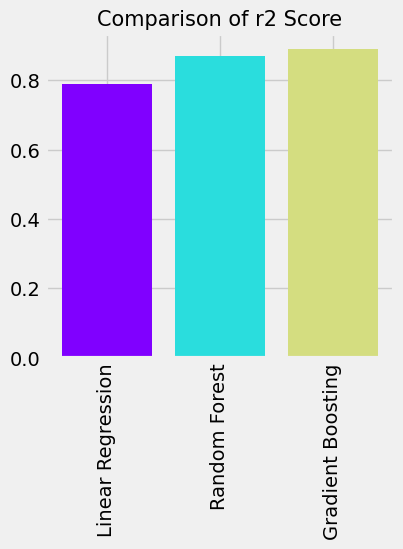

In [31]:
r2_score = np.array([0.79, 0.87, 0.89])
labels = np.array(['Linear Regression', 'Random Forest' 'Gradient Boosting'])
index = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 4))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (4, 4)

plt.bar(range(len(index)), r2_score[index], color = color)
plt.xticks(range(0, 3), ['Linear Regression', 'Random Forest','Gradient Boosting'], rotation = 90)
plt.title('Comparison of r2 Score', fontsize = 15)
plt.show()